
Энэхүү лаборторын ажлаар Linkpred сангийн хэрэглээний талаар авч үзлээ.

**linkpred гэж юу вэ?**

linkpred бол графан дээр ирээдүйд үүсч болох холбоосуудыг (edge) урьдчилан таамаглахад зориулагдсан Python сан юм.

  Жишээлбэл: Хоёр хүн одоогоор найз биш ч ирээдүйд найз болох магадлалтай эсэхийг таамаглах.

1. Таамаглах үйл явцын дараалал
linkpred нь дараах 3-н үе шаттайгаар Холбоосыг таамаглах үйл явцыг биелүүлдэг.
  1. Сүлжээгээ байгуулах - Network Loading
  2. Таамаглагчаа сонгох, аппликейшн - Predictor selection and application
  3. Үр дүн үнэлэх - Results evaluation

1.A Файлаас уншиж сүлжээг байгуулах \\


  Эхлээд, linkpred нь файлаас графыг уншихыг шаарддаг. Бид энэ удаа Game of Thrones Season 6
  (Хаадын тоглоом цуврал)-ийн ирмэгүүдийн мэдээллийг ашиглана.

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import linkpred

def read_net_w(filename):
    g = nx.Graph()
    with open(filename) as f:
        f.readline()
        for l in f:
            l = l.split(",")
            g.add_edge(l[0], l[1], weight=int(l[2]))
    return g

# Game of Thrones data
g = read_net_w(f'/datalab/got-s6-edges.csv')



1.B Удирдлагагүй сургалтын таамаглагч тооцоолох \\
linkpred нь 4 бүлэг удирдлагагүй сургалтын таамаглагчид өргөн хэрэглэгдэж байна. Үүнд:
  
*   Neighborhood: \\
    AdamicAdar, AssociationStrength, CommonNeighbours, Cosine, DegreeProduct,
    Jaccard, MaxOverlap, MinOverlap, NMeasure, Pearson,ResourceAllocation
*   Paths: \\
    GraphDistance, Katz
*   Ranking:
    SimRank, RootedPageRank
*    Miscellanea: \\
    Community, Copy, Random
  
  Энгийн ойлгомжтой байлгахын тулд сонгогдсон таамаглагч бүрт топ-5 нь үр дүнг харууллаа.

1.B.1 Neighborhood \\
Эхний хэсэг бүлэг таамаглагч бол зангилаа бүрийн хувьд холбогдох боломжтой хос оройг уг хоёр оройн
хөрш оройнуудтайгаа хэр хүчтэй сул холбогдсон байдлаас үүдэн холбоосыг
үүсэх эсэх магадлалаар олдог.
Энэ төрлийн таамаглагчид нь дараах асуултанд хариулт олохыг хичээдэг. How many friend we have to
share in order to become friends? \\

**Common Neighbors** \\

Илүү олон дундын найзуудтай бол бид найз болох магадлал өндөр байна.

In [ ]:
cn = linkpred.predictors.CommonNeighbours(g, excluded=g.edges()) # We aim to predict only new links, thus we exclude existing ones
cn_results = cn.predict()

top = cn_results.top(5)
for edge, score in top.items():
    print(edge, score)


TOMMEN - MACE 8.0
NED - LADY_CRANE 8.0
NED - CLARENZO 8.0
MARGAERY - IZEMBARO 8.0
MARGAERY - ARYA 8.0


 **Jaccard** \\
Топологи бүтэц болон аттрибутуудын ижил төсөөтэй байдал нь найз болох эсэхийг тодорхойлно.

In [ ]:
jc = linkpred.predictors.Jaccard(g, excluded=g.edges())
jc_results = jc.predict()

top = jc_results.top(5)
for edge, score in top.items():
    print(edge, score)

RED_PRIEST - KINVARA 1.0
LITTLE_SAM - DICKON 1.0
TOMMEN - MACE 0.7272727272727273
JOFFREY - CAMELLO 0.7272727272727273
OLD_NAN - BENJEN 0.7142857142857143


**Adamic Adar** \\

Бидний дундын найзын тоо нь биднийг найз болох эсэхийг тодорхойлоход ашиглагдана.

In [ ]:
aa = linkpred.predictors.AdamicAdar(g, excluded=g.edges())
aa_results = aa.predict()

top = aa_results.top(5)
for edge, score in top.items():
    print(edge, score)

TOMMEN - MACE 3.1875572810307897
NED - LADY_CRANE 3.1263711657257836
NED - CLARENZO 3.1263711657257836
SANSA - ROBB 3.0966443151332466
JOFFREY - CAMELLO 2.8944937119329137


1.B.2 Paths \\
Хоёрдогч төрлийн таамаглагчид нь хос оройн хоорондын зайнаас хамаарч тэд ирээдүйд холбогдох эсэхийг магадлаар боддог.
Энэ төрлийн таамаглагчид нь дараах асуултад хариулт олохыг хичээдэг: How distant are we?

Katz

Катц хоёр зангилааны хоорондох бүх замуудын жигнэсэн нийлбэрийг тооцдог.

In [ ]:
kz = linkpred.predictors.Katz(g, excluded=g.edges())
kz_results = kz.predict()

top = kz_results.top(5)
for edge, score in top.items():
    print(edge, score)


LADY_CRANE - JAQEN 0.005571576860773001
SANSA - ALLISER_THORNE 0.004234378077202
TYRION - DAARIO 0.004145905054793999
CERSEI - BRIENNE 0.0038862606857720003
MELISANDRE - LYANNA_MORMONT 0.0035937193855959996



**Graph Distance** \\

Графын зай буюу Distance нь хоёр оройн хоорондын богино замын уртаар тодорхойлогдоно.

In [ ]:
gd = linkpred.predictors.GraphDistance(g, excluded=g.edges())
gd_results = gd.predict()

top = gd_results.top(5)
for edge, score in top.items():
    print(edge, score)

LADY_CRANE - JAQEN 36.136054421768705
TYRION - DAARIO 30.29268292682927
CERSEI - BRIENNE 28.44827586206896
MELISANDRE - LITTLEFINGER 23.427491305005294
CERSEI - BRONN 23.294117647058822


1.B.3 Rankig \\

Гуравдагч бүлэг таамаглагчид нь граф дахь хос оройнуудын байрлалаас хамаарч холбогдох магадлалыг тооцоолно.
Дараах асуултанд хариулж буй байдлаас хамаарч тодорхойлогдоно:
*How similar are we?* \\
SimRank \\

Хоёр зангилаа холбоосоор холбогдохын тул тэдгээрийн хөрш оройнууд ижил төсөөтэй байх хэрэгтэй.

In [ ]:
simrank = linkpred.predictors.SimRank(g, excluded=g.edges())
simrank_results = simrank.predict(c=0.5)

top = simrank_results.top(5)
for edge, score in top.items():
    print(edge, score)

MAESTER_CITADEL - MAESTER_AEMON 0.3920701611834253
RAY - GATINS 0.3886464843365491
GATINS - BERIC 0.3675791855431439
THOROS - GATINS 0.3636591552182033
MAESTER_AEMON - GILLY 0.319889623157789


1.B.4 Miscellanea \\

Энэ нь холбоосыг таамаглахдаа санамсаргүй байдлаар сонгож авдаг.
linkpred groups here approaches that are commonly used as baselines. \\

Random \\

Санамсаргүй байдлаар таах.

In [ ]:
rnd = linkpred.predictors.Random(g, excluded=g.edges())
rnd_results = rnd.predict()

top = rnd_results.top(5)
for edge, score in top.items():
    print(edge, score)

TRYSTANE - THREE_EYED_RAVEN 0.9999871347420597
SAM - ROBERT 0.9998970503344354
ROOSE_BOLTON - HODOR 0.9998494309998781
THOROS - KINVARA 0.9998353168966768
SANSA - QYBURN 0.9997264864064107


1.C Evaluation and comparison of different predictors \\

Холбоосын таамаглагчийг үнэлэхийн тулд сургалтанд ашигладаг сүлжээг туршилтын зорилгоор ашигладаг сүлжээнээс салгах хэрэгтэй.

In [ ]:
import random
import itertools
from linkpred.evaluation import Pair

# Building the test network
test = read_net_w(f'/datalab/got-s7-edges.csv')

# Exclude test network from learning phase
training = g.copy()

# Node set
nodes = list(g.nodes())
nodes.extend(list(test.nodes()))

# Compute the test set and the universe set
test = [Pair(i) for i in test.edges()]
universe = set([Pair(i) for i in itertools.product(nodes, nodes) if i[0]!=i[1]])

Үүний дараа урьдчилан таамаглагчдыг сургалтын сүлжээнд ашиглаж болно

In [ ]:
cn = linkpred.predictors.CommonNeighbours(training, excluded=training.edges())
cn_results = cn.predict()

aa = linkpred.predictors.AdamicAdar(training, excluded=training.edges())
aa_results = aa.predict()

jc = linkpred.predictors.Jaccard(training, excluded=training.edges())
jc_results = jc.predict()


Тиймээс бид олж авсан таамаглалыг тестийн эсрэг үнэлэх боломжтой

In [ ]:
cn_evaluation = linkpred.evaluation.EvaluationSheet(cn_results, test, universe)
aa_evaluation = linkpred.evaluation.EvaluationSheet(aa_results, test, universe)
jc_evaluation = linkpred.evaluation.EvaluationSheet(jc_results, test, universe)


Үр дүнг ROC график ашиглан хялбархан харьцуулж болно

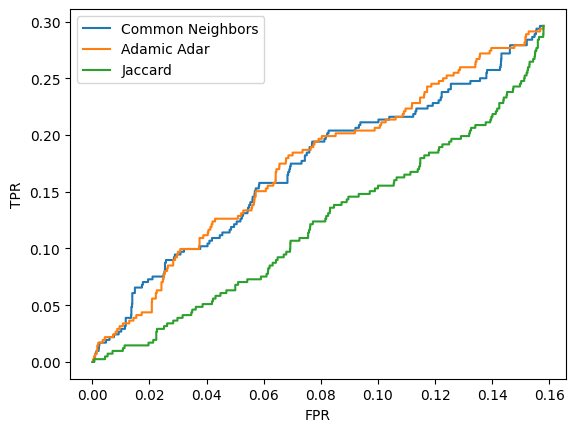

In [ ]:
plt.plot(cn_evaluation.fallout(), cn_evaluation.recall(), label="Common Neighbors")
plt.plot(aa_evaluation.fallout(), aa_evaluation.recall(), label="Adamic Adar")
plt.plot(jc_evaluation.fallout(), jc_evaluation.recall(), label="Jaccard")
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.legend()
plt.show()


ROC муруйгаар санал болгож буй үр дүнг нэгтгэн дүгнэх энгийн арга бол түүний AUC юм

In [ ]:
from sklearn.metrics import auc

print("Area Under Roc Curve (AUROC)")
print(f"Common Neigh.: \t {auc(cn_evaluation.fallout(), cn_evaluation.recall())}")
print(f"Adamic Adar: \t {auc(aa_evaluation.fallout(), aa_evaluation.recall())}")
print(f"Jaccard: \t {auc(jc_evaluation.fallout(), jc_evaluation.recall())}")

Area Under Roc Curve (AUROC)
Common Neigh.: 	 0.026832485313825823
Adamic Adar: 	 0.02725942524335776
Jaccard: 	 0.018894838921578106


**Даалгавар:**

1. Jaccard болон Adamic Adar хоёр яагаад ялгаатай үр дүн үзүүлж байна вэ? Тайлбарлана уу.


**Jaccard Index гэж юу вэ?** \\

Jaccard нь хоёр оройн хөршүүдийн нийтлэг хэсэг болон нийлбэрийн харьцааг авдаг:
$$
Jaccard(u, v) = \frac{|N(u) \cap N(v)|}{|N(u) \cup N(v)|}
$$


  N(u): u оройн хөршүүд

  Jaccard нь хоёр оройн хөршүүд хэр зэрэг төстэй вэ? гэдгийг хэмжинэ.

  Ижил хөрштэй бол өндөр оноо өгнө.

  Их хөрштэй ч давхцал багатай бол оноо буурна.

**Adamic-Adar гэж юу вэ?**

Adamic-Adar нь мөн нийтлэг хөрш дээр үндэслэдэг, гэхдээ нийтлэг хөршийн "ховор байдалд" жин өгдөг.

$$
AdamicAdar(u, v) = \sum_{w \in N(u) \cap N(v)} \frac{1}{\log(|N(w)|)}
$$

  N(w): w оройн хөршүүдийн тоо.

  Хэрвээ нийтлэг хөрш w цөөн найзтай бол (өөрөөр хэлбэл "ховор" хөрш) өндөр жин өгнө.

  Тэгэхээр ердийн биш, онцгой нийтийн найз байвал илүү оноо авна.


2. linkpred санг ашиглан desicion tree алгоритмаар холбоосыг илрүүлж болох уу.

linkpred сан нь графан дээрх холбоосын урьдчилсан таамаглал (link prediction) хийхэд зориулагдсан бөгөөд Jaccard, Adamic-Adar, Preferential Attachment зэрэг хиймэл оноо өгөх эвристик арга ашигладаг. Харин Decision Tree шиг машин сургалтын (machine learning) алгоритмуудыг шууд дэмждэггүй.